<a id='import'></a>
# 1. Import Data and Libraries

>1.1 Set ID

>1.2 Remove Duplicates (3)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

### 1.1 Set ID and Import Data

In [2]:
df = pd.read_csv('cluster.csv')
df.index.name = 'BookingID' # set variable Name as the index of the dataframe
df

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15585,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15586,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4


In [3]:
df.describe

<bound method NDFrame.describe of              Churn                    Name Longevity  Year_Birth TypeTravel  \
BookingID                                                                     
0            churn       Ms. Nicole Clarke       yes      1974.0   business   
1          nochurn         Mr. Jesse Scott       yes      1965.0   business   
2            churn  Mr. Christopher Carter       yes      1973.0   business   
3          nochurn     Ms. Jennifer Morgan       yes      1993.0    leisure   
4          nochurn       Mr. Michael White       yes      1989.0   business   
...            ...                     ...       ...         ...        ...   
15584        churn       Ms. Wendy Roberts        no      1988.0   business   
15585        churn         Ms. Sonya Smith        no      2000.0   business   
15586      nochurn      Mr. Maxwell Wright       yes      1964.0   business   
15587      nochurn       Mr. Gregory Moran       yes      1992.0    leisure   
15588        churn

### 1.2 Check for duplicates and drop them

In [4]:
df[df.duplicated(keep = False)]

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
8194,nochurn,Ms. Abigail York,yes,1995.0,leisure,double,5098,5,5,5,...,4,5,5,3,3,4,3,3,3,5
8195,nochurn,Ms. Abigail York,yes,1995.0,leisure,double,5098,5,5,5,...,4,5,5,3,3,4,3,3,3,5
9175,churn,Ms. Abigail Kennedy,yes,1991.0,business,suite,5932,3,3,2,...,3,3,3,3,4,1,4,3,4,3
9176,churn,Ms. Abigail Kennedy,yes,1991.0,business,suite,5932,3,3,2,...,3,3,3,3,4,1,4,3,4,3
9416,nochurn,Ms. Abigail Buchanan,yes,1972.0,business,double,6769,5,4,4,...,5,5,4,5,5,5,5,2,5,1
9417,nochurn,Ms. Abigail Buchanan,yes,1972.0,business,double,6769,5,4,4,...,5,5,4,5,5,5,5,2,5,1


In [5]:
df.drop_duplicates(inplace = True)
df

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15585,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15586,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4


### 2. Data Exploration

#### 2.1 Overview of the Data

In [6]:
df.shape

(15586, 21)

In [7]:
df.columns

Index(['Churn', 'Name', 'Longevity', 'Year_Birth', 'TypeTravel', 'RoomType',
       'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15586 entries, 0 to 15588
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15586 non-null  object 
 1   Name               15586 non-null  object 
 2   Longevity          15586 non-null  object 
 3   Year_Birth         15391 non-null  float64
 4   TypeTravel         15586 non-null  object 
 5   RoomType           15586 non-null  object 
 6   RewardPoints       15586 non-null  int64  
 7   Comfort            15586 non-null  int64  
 8   ReceptionSchedule  15586 non-null  int64  
 9   FoodDrink          15586 non-null  int64  
 10  Location           15586 non-null  int64  
 11  Wifi               15586 non-null  int64  
 12  Amenities          15586 non-null  int64  
 13  Staff              15586 non-null  int64  
 14  OnlineBooking      15586 non-null  int64  
 15  PriceQuality       15586 non-null  int64  
 16  RoomSpace          155

Only the column Year_Birth has NaN values. All variables from the survey are integers, the year of birth is a float and the remaining variables are objects.

In [9]:
df.describe().T # All numeric variables

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15391.0,1981.705607,15.179757,1936.0,1970.0,1981.0,1994.00,2014.0
RewardPoints,15586.0,5022.418581,1027.940126,409.0,4445.0,5088.0,5648.75,6950.0
Comfort,15586.0,2.841332,1.388541,0.0,2.0,3.0,4.00,5.0
ReceptionSchedule,15586.0,2.997049,1.519035,0.0,2.0,3.0,4.00,5.0
FoodDrink,15586.0,2.844412,1.436937,0.0,2.0,3.0,4.00,5.0
Location,15586.0,2.985821,1.299438,1.0,2.0,3.0,4.00,5.0
Wifi,15586.0,3.244963,1.327064,0.0,2.0,3.0,4.00,6.0
Amenities,15586.0,3.374631,1.352419,0.0,2.0,4.0,4.00,5.0
Staff,15586.0,3.506288,1.319625,1.0,3.0,4.0,5.00,5.0
OnlineBooking,15586.0,3.454190,1.310401,0.0,2.0,4.0,5.00,5.0


The Year_Birth variable has a maximum value of 2014 which might indicate a problem with that particular entry, because it would mean that a 8 year old would have done the booking.
The RewardsPoints variable has a vary high standard deviation and a very high range between the minimum and maximum values, therefore this variable must be standardized before applying the kmeans algorithm.
The Wifi variable has a maximum value of 6 which is an error because the maximum value allowed by the survey was a 5.

In [10]:
df.skew()

/var/folders/hs/t_th7f6j6tsb1fg2d7_808y80000gn/T/ipykernel_6839/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Year_Birth          -0.003724
RewardPoints        -0.453744
Comfort             -0.100806
ReceptionSchedule   -0.260518
FoodDrink           -0.123543
Location            -0.050057
Wifi                -0.171105
Amenities           -0.599424
Staff               -0.554468
OnlineBooking       -0.472109
PriceQuality        -0.503290
RoomSpace           -0.482872
CheckOut            -0.750667
Checkin             -0.382822
Cleanliness         -0.745109
BarService          -0.358340
dtype: float64

How to interpret the skewness:
- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
- If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
- If the skewness is less than -1 or greater than 1, the data are highly skewed.


Amenities, Staff, PriceQuality, CheckOut and Cleanliness appear to have a moderate negative skewness.

In [11]:
df.kurt()

/var/folders/hs/t_th7f6j6tsb1fg2d7_808y80000gn/T/ipykernel_6839/1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Year_Birth          -0.729844
RewardPoints         0.260162
Comfort             -0.935490
ReceptionSchedule   -1.077415
FoodDrink           -0.967006
Location            -1.076634
Wifi                -1.111382
Amenities           -0.540790
Staff               -0.859138
OnlineBooking       -0.931961
PriceQuality        -0.772889
RoomSpace           -0.864568
CheckOut            -0.225208
Checkin             -0.812148
Cleanliness         -0.225374
BarService          -0.949633
dtype: float64

The variable with the highest kurtosis are ReceptionSchedule, Location, Wifi. RewardPoints variable has a positive kurtosis while its skewness statistic was negative.

In [12]:
df.describe(include = ['O']) # incluir as variáveis categóricas no describe

,Churn,Name,Longevity,TypeTravel,RoomType
count,15586,15586,15586,15586,15586
unique,2,14227,3,2,3
top,nochurn,Mr. Michael Smith,yes,business,single
freq,8475,9,12545,10754,7442


All categorical variable have no NaN values. 
There are 14.227 unique clients in the booking dataset, and the client that has used the Book Me services more often was Mr. Michael Smith with 9 bookings.
We have a problem with the Longevity variable, since it is a binary variable (yes or no) and there are 3 unique values in that variable.
It appears that the most common TypeTravel is the business travel and the RoomType that is booked the most is the single room.
Below we will inspect every variable in the dataset individually.

In [13]:
df['Churn'].value_counts()

nochurn    8475
churn      7111
Name: Churn, dtype: int64

No problems with this variable, we only need to turn it into a flag.

In [14]:
df['Name'].value_counts()

Mr. Michael Smith     9
Mr. John Smith        7
Ms. Amanda Smith      7
Mr. Michael Davis     6
Ms. Jennifer Smith    6
                     ..
Ms. Laurie Smith      1
Mr. Aaron Cox         1
Ms. Natasha Estes     1
Ms. Beverly Lee       1
Mr. Steven Mendez     1
Name: Name, Length: 14227, dtype: int64

Use this variable to create a new variable called Gender and then turn it into a flag.

In [15]:
df['Longevity'].value_counts()

yes    12545
no      2874
y        167
Name: Longevity, dtype: int64

Transform the "y" into "yes". Then transform the variable into a flag.

In [16]:
df['Year_Birth'].value_counts(ascending = True)

1936.0      2
1942.0      3
1943.0      6
1945.0      8
1947.0      9
         ... 
1981.0    369
1998.0    380
1980.0    383
1996.0    416
1982.0    441
Name: Year_Birth, Length: 75, dtype: int64

Needs further investigation to know what to do with the entries made by children.

In [17]:
df['TypeTravel'].value_counts()

business    10754
leisure      4832
Name: TypeTravel, dtype: int64

No problems with this variable. Needs to be turned into a flag.

In [18]:
df['RoomType'].value_counts()

single    7442
double    7019
suite     1125
Name: RoomType, dtype: int64

No problems with this variable. Needs to be turned into a flag. To do that we must encode the variable into 2 columns.

In [19]:
df['RewardPoints'].value_counts()

5286    19
5010    17
5094    16
4942    16
5347    16
        ..
6666     1
3927     1
1766     1
4706     1
3304     1
Name: RewardPoints, Length: 4061, dtype: int64

This variable has a very high range and it must be normalized.

In [20]:
df['Comfort'].value_counts(ascending = True)

0     574
5    2100
1    2487
2    3452
4    3475
3    3498
Name: Comfort, dtype: int64

No problems with this variable.

In [21]:
df['ReceptionSchedule'].value_counts(ascending = True)

0     776
1    2484
2    2725
3    2797
5    3171
4    3633
Name: ReceptionSchedule, dtype: int64

No problems with this variable.

In [22]:
df['FoodDrink'].value_counts(ascending = True)

0     731
5    2353
1    2490
2    3282
4    3324
3    3406
Name: FoodDrink, dtype: int64

No problems with this variable.

In [23]:
df['Location'].value_counts(ascending = True)

5    2252
1    2687
2    2957
4    3606
3    4084
Name: Location, dtype: int64

No problems with this variable.

In [24]:
df['Wifi'].value_counts(ascending = True)

0      18
6      36
1    1792
2    3245
3    3347
5    3445
4    3703
Name: Wifi, dtype: int64

There are 36 input values with 6 selected. This value is not a valied and must be transformed into a number from 0 to 5.

In [25]:
df['Amenities'].value_counts(ascending = True)

0     376
1    1427
2    2307
3    2931
5    3583
4    4962
Name: Amenities, dtype: int64

No problems with this variable.

In [26]:
df['Staff'].value_counts(ascending = True)

1    1733
2    2107
3    2598
5    4316
4    4832
Name: Staff, dtype: int64

No problems with this variable.

In [27]:
df['OnlineBooking'].value_counts(ascending = True)

0       2
1    1664
2    2391
3    2779
5    4054
4    4696
Name: OnlineBooking, dtype: int64

No problems with this variable.

In [28]:
df['PriceQuality'].value_counts(ascending = True)

1    1610
2    2005
3    3345
5    3762
4    4864
Name: PriceQuality, dtype: int64

No problems with this variable.

In [29]:
df['RoomSpace'].value_counts(ascending = True)

0      46
1    1386
2    2624
3    2701
5    4044
4    4785
Name: RoomSpace, dtype: int64

No problems with this variable.

In [30]:
df['CheckOut'].value_counts(ascending = True)

1     971
2    1574
3    2947
5    4340
4    5754
Name: CheckOut, dtype: int64

No problems with this variable.

In [31]:
df['Checkin'].value_counts(ascending = True)

2    1850
1    1907
5    3221
3    4283
4    4325
Name: Checkin, dtype: int64

No problems with this variable.

In [32]:
df['Cleanliness'].value_counts(ascending = True)

1     962
2    1602
3    2944
5    4238
4    5840
Name: Cleanliness, dtype: int64

No problems with this variable.

In [33]:
df['BarService'].value_counts(ascending = True)

0       2
1    1845
2    2272
5    3591
3    3675
4    4201
Name: BarService, dtype: int64

No problems with this variable.

#### 2.2 Data Viz

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

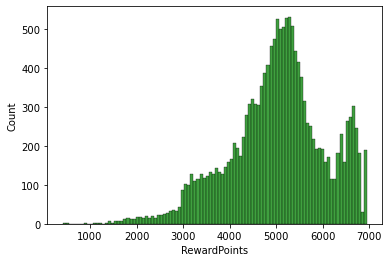

In [34]:
sns.histplot(df['RewardPoints'], color = 'g', bins = 100)

<AxesSubplot:xlabel='Year_Birth', ylabel='RewardPoints'>

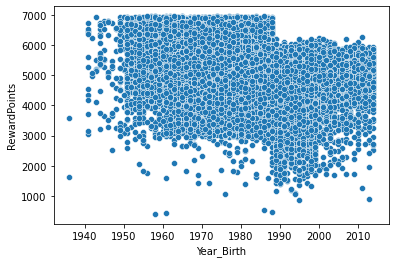

In [35]:
sns.scatterplot(x = 'Year_Birth', y = 'RewardPoints', data = df)

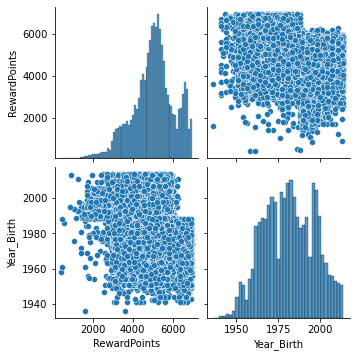

In [36]:
df_subset = df[['RewardPoints', 'Year_Birth']].copy()
sns.pairplot(df_subset)

<AxesSubplot:>

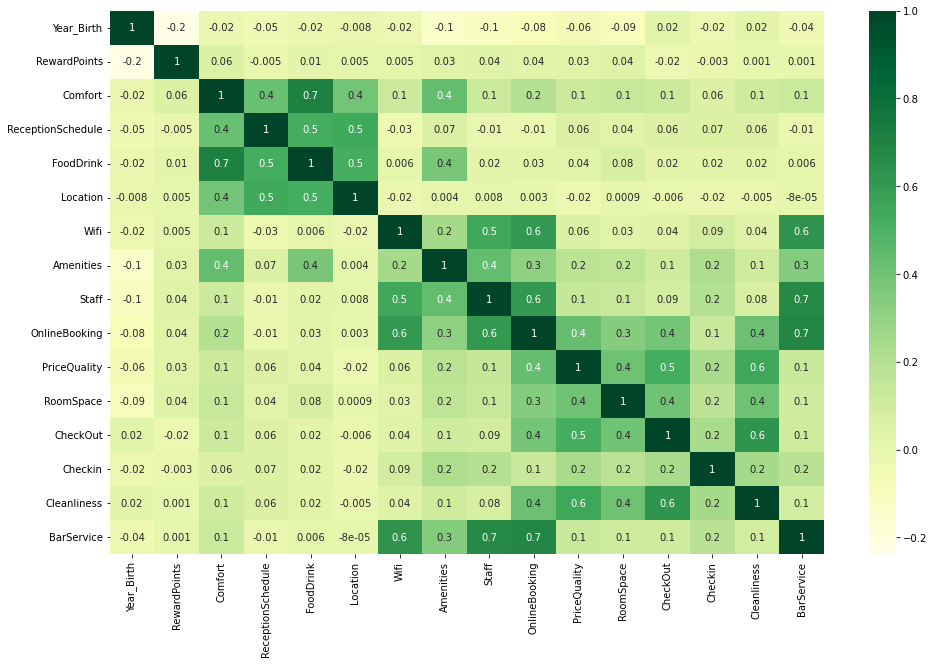

In [37]:
df_corr = df.corr(method = 'pearson')
figure = plt.figure(figsize = (16, 10))
sns.heatmap(df_corr, cmap = 'YlGn',annot = True, fmt = '.1g')

### 3. Data Transformation

##### 3.1 Outliers

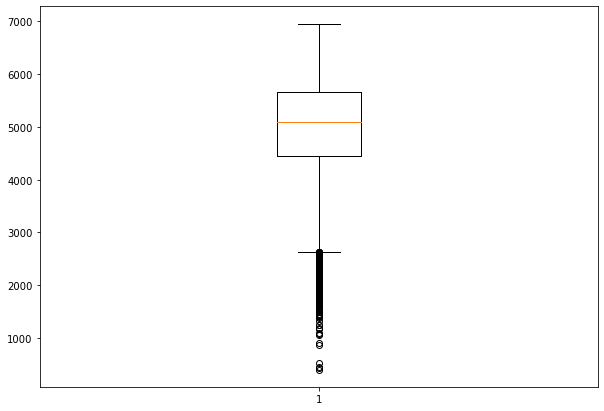

In [38]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df['RewardPoints'])
 
# show plot
plt.show()

In [39]:
df[df['RewardPoints'] < 1000].index

Int64Index([5779, 8158, 9676, 11434, 12151, 14528], dtype='int64', name='BookingID')

By filtering 'RewardPoints' by datapoints lower than 1000 we found 6 entries that we consider as outliers (0,025% of total dataset)

In [40]:
df.drop(df[df['RewardPoints'] < 1000].index, inplace = True)
df

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15585,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15586,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4


In [41]:
df['Longevity'] = df['Longevity'].replace('y', 'yes')
df['Longevity'].value_counts()

yes    12707
no      2873
Name: Longevity, dtype: int64

The 167 'y' were transformed to 'yes'

In [42]:
df['Wifi'] = df['Wifi'].replace(6,df['Wifi'].value_counts().idxmax())
df['Wifi'].value_counts()

4    3737
5    3445
3    3346
2    3244
1    1791
0      17
Name: Wifi, dtype: int64

We decided to replace the 'Wifi' observations that have a value of 6 with the mode of all observations, since we are not sure if people wanted to give a rating of 5 or if they though if the rating scale was from 0 to 10.

In [43]:
from datetime import date
df['Age'] = date.today().year - df['Year_Birth'] # define a new variable called Age
df.drop('Year_Birth', axis = 1, inplace = True)
df

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age
BookingID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,business,single,4907,3,4,1,4,...,3,4,3,3,3,3,4,3,4,48.0
1,nochurn,Mr. Jesse Scott,yes,business,single,6724,1,1,1,1,...,3,4,5,5,5,5,1,5,2,57.0
2,churn,Mr. Christopher Carter,yes,business,single,4365,3,3,3,3,...,4,4,3,3,2,3,2,3,1,49.0
3,nochurn,Ms. Jennifer Morgan,yes,leisure,double,3849,1,1,1,1,...,4,5,4,4,4,4,4,4,3,29.0
4,nochurn,Mr. Michael White,yes,business,single,5376,2,2,3,2,...,5,5,5,5,3,4,1,3,5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,business,double,4968,2,0,2,2,...,2,4,3,4,5,1,3,4,3,34.0
15585,churn,Ms. Sonya Smith,no,business,double,4970,3,3,3,3,...,3,5,5,3,1,3,4,4,5,22.0
15586,nochurn,Mr. Maxwell Wright,yes,business,single,4046,1,1,1,1,...,4,5,4,4,4,4,5,4,4,58.0


Create a new variable called 'Age' that consists of subtracting 2022 to the year of birth of each client. 
After computing this new variable we remove the 'Year_Birth' variable from the dataset.

#### 3.2 Create Dummy Variables

##### Gender

In [44]:
df['prefix'] = df['Name'].str[0:2]
df['Gender'] = np.where(df['prefix']!= 'Mr', '1', '0')
df.drop('prefix', axis = 1, inplace = True)
df

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age,Gender
BookingID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,business,single,4907,3,4,1,4,...,4,3,3,3,3,4,3,4,48.0,1
1,nochurn,Mr. Jesse Scott,yes,business,single,6724,1,1,1,1,...,4,5,5,5,5,1,5,2,57.0,0
2,churn,Mr. Christopher Carter,yes,business,single,4365,3,3,3,3,...,4,3,3,2,3,2,3,1,49.0,0
3,nochurn,Ms. Jennifer Morgan,yes,leisure,double,3849,1,1,1,1,...,5,4,4,4,4,4,4,3,29.0,1
4,nochurn,Mr. Michael White,yes,business,single,5376,2,2,3,2,...,5,5,5,3,4,1,3,5,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,business,double,4968,2,0,2,2,...,4,3,4,5,1,3,4,3,34.0,1
15585,churn,Ms. Sonya Smith,no,business,double,4970,3,3,3,3,...,5,5,3,1,3,4,4,5,22.0,1
15586,nochurn,Mr. Maxwell Wright,yes,business,single,4046,1,1,1,1,...,5,4,4,4,4,5,4,4,58.0,0


Generate the Gender variable using the prefix of the 'Name'.
Encode the Gender variable into a dummy variable. If the client is female 'Gender' = 1, if it is male 'Gender' = 0

<AxesSubplot:xlabel='count', ylabel='TypeTravel'>

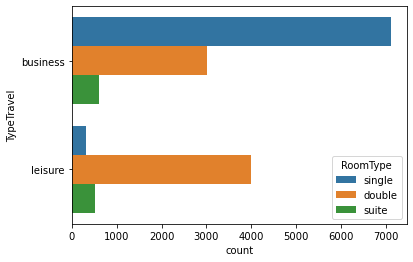

In [45]:
sns.countplot(y = 'TypeTravel', hue = 'RoomType', data = df)

Business type travels most likely will choose a single room, while leisure type travel will choose double rooms

<AxesSubplot:xlabel='count', ylabel='TypeTravel'>

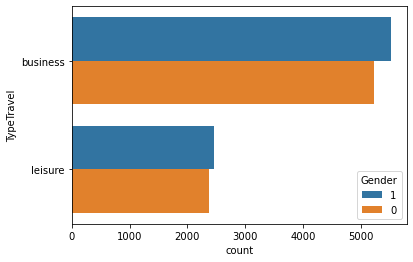

In [46]:
sns.countplot(y = 'TypeTravel', hue = 'Gender', data = df)

<AxesSubplot:xlabel='count', ylabel='RoomType'>

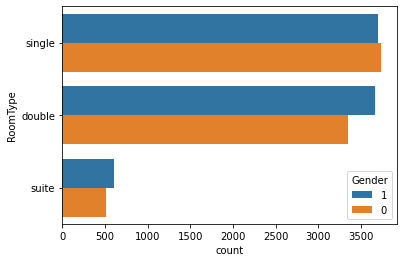

In [47]:
sns.countplot(y = 'RoomType', hue = 'Gender', data = df)

##### Longevity

In [48]:
df['d_Longevity'] = np.where(df['Longevity'] != 'no', '1', '0')

Create a dummy variable for 'Longevity'. If 'Longevity' = 'yes' use dummy 1, if 'Longevity' = 'no' use dummy 0.

##### Churn

In [49]:
df['d_Churn'] = np.where(df['Churn'] != 'nochurn', '1', '0')

Create a dummy variable for 'Churn'. If 'Churn' = 'churn' use dummy 1, if 'Churn' = 'nochurn' use dummy 0.

##### Type Travel

In [50]:
df['d_TypeTravel'] = np.where(df['TypeTravel'] != 'leisure', '1', '0')

Create a dummy variable for 'TypeTravel'. If 'TypeTravel' = 'business' use dummy 1, if 'TypeTravel' = 'leisure' use dummy 0.

##### Room Type

In [51]:
df['d_Single'] = np.where(df['RoomType'] == 'single', '1', '0')
df['d_Double'] = np.where(df['RoomType'] != 'double', '1', '0')

Create two dummy variables for 'RoomType'. If 'd_Single' = 0 and 'd_Double' = 0 it means that the room is a suite. 

In [52]:
df['Recommendation'] = df[['Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService']].mean(axis = 1)
df

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Cleanliness,BarService,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,Recommendation
BookingID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,business,single,4907,3,4,1,4,...,3,4,48.0,1,1,1,1,1,1,3.285714
1,nochurn,Mr. Jesse Scott,yes,business,single,6724,1,1,1,1,...,5,2,57.0,0,1,0,1,1,1,3.142857
2,churn,Mr. Christopher Carter,yes,business,single,4365,3,3,3,3,...,3,1,49.0,0,1,1,1,1,1,2.714286
3,nochurn,Ms. Jennifer Morgan,yes,leisure,double,3849,1,1,1,1,...,4,3,29.0,1,1,0,0,0,0,3.142857
4,nochurn,Mr. Michael White,yes,business,single,5376,2,2,3,2,...,3,5,33.0,0,1,0,1,1,1,3.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,business,double,4968,2,0,2,2,...,4,3,34.0,1,0,1,1,0,0,2.714286
15585,churn,Ms. Sonya Smith,no,business,double,4970,3,3,3,3,...,4,5,22.0,1,0,1,1,0,0,3.571429
15586,nochurn,Mr. Maxwell Wright,yes,business,single,4046,1,1,1,1,...,4,4,58.0,0,1,0,1,1,1,3.214286


Create a new variable 'Recomendation' that is equal to the mean of all the surveys variables for each Booking ID.

In [53]:
df = df[['Name', 'Age', 'Gender', 'd_Longevity','d_Churn', 'd_TypeTravel', 'd_Single', 'd_Double', 'RewardPoints', 'Recommendation',
               'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking',
               'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService']]
df.head()

,Name,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
0,Ms. Nicole Clarke,48.0,1,1,1,1,1,1,4907,3.285714,...,4,3,4,3,3,3,3,4,3,4
1,Mr. Jesse Scott,57.0,0,1,0,1,1,1,6724,3.142857,...,5,3,4,5,5,5,5,1,5,2
2,Mr. Christopher Carter,49.0,0,1,1,1,1,1,4365,2.714286,...,1,4,4,3,3,2,3,2,3,1
3,Ms. Jennifer Morgan,29.0,1,1,0,0,0,0,3849,3.142857,...,4,4,5,4,4,4,4,4,4,3
4,Mr. Michael White,33.0,0,1,0,1,1,1,5376,3.571429,...,5,5,5,5,5,3,4,1,3,5


#### 3.2 Handling Missing Values

In [54]:
df.isna().sum()

Name                   0
Age                  195
Gender                 0
d_Longevity            0
d_Churn                0
d_TypeTravel           0
d_Single               0
d_Double               0
RewardPoints           0
Recommendation         0
Comfort                0
ReceptionSchedule      0
FoodDrink              0
Location               0
Wifi                   0
Amenities              0
Staff                  0
OnlineBooking          0
PriceQuality           0
RoomSpace              0
CheckOut               0
Checkin                0
Cleanliness            0
BarService             0
dtype: int64

Existem 195 observações com valores nulos para a idade. Existem ainda 1359 observações para as quais o nome do cliente é duplicado. Porém, apenas dois nomes constam em ambas as listas, i.e. Nomes que numa observação têm missing value para a idade e mas na observação duplicada têm data de nascimento.
Não tendo a certeza se é a mesma pessoa ou somente clientes com nomes iguais, não iremos substituir os 2 NaN por estes valores. Faremos a substituição de todos os valores NaN para a idade recorrendo ao KNN Imputer.

In [55]:
df[df['Age'].isna() & df['Name'].duplicated()]

,Name,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
3125,Ms. Elizabeth Davis,NaN,1,1,0,1,1,1,3022,4.428571,...,5,5,5,5,5,5,5,5,5,5
3894,Ms. Elizabeth Rodriguez,NaN,1,1,1,1,1,1,4693,3.071429,...,4,3,3,2,1,3,2,3,1,3
4298,Ms. Elizabeth Boyer,NaN,1,0,1,1,0,0,4681,2.857143,...,2,4,2,2,5,3,2,1,4,2
5094,Ms. Elizabeth Martinez,NaN,1,1,0,1,1,1,3323,3.785714,...,2,4,4,4,4,4,4,4,4,3
5445,Ms. Elizabeth Brown,NaN,1,1,0,0,0,0,6103,3.428571,...,4,4,4,4,4,2,4,5,5,4
5719,Ms. Elizabeth Smith,NaN,1,1,0,1,0,0,4621,3.714286,...,5,5,5,5,1,4,5,1,5,5
6060,Ms. Elizabeth Rodriguez,NaN,1,1,0,0,0,0,6003,4.071429,...,2,5,4,4,4,4,4,5,4,5
6774,Mr. Edward Williams,NaN,0,1,1,0,0,0,5235,2.857143,...,2,3,5,2,1,4,4,4,1,2
8542,Ms. Elizabeth Brown,NaN,1,1,0,1,0,0,6762,3.000000,...,5,4,2,3,3,3,3,5,3,2


In [56]:
null = df[df['Age'].isna()]  # bookings que têm Missing Values para ano
dup = df[df.Name.duplicated() & df['Age']]             #bookings que têm nomes duplicados
listanomes = list(set(null.Name) & set(dup.Name)) #criar uma lista dos nomes presentes em ambas as tabelas
dup[dup['Name'].isin(listanomes)].head()

,Name,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
4187,Mr. Edward Anderson,22.0,0,1,1,0,0,0,4853,2.428571,...,2,2,3,2,3,1,3,2,4,2
10123,Ms. Emily Thomas,33.0,1,1,1,1,0,0,4138,3.500000,...,3,3,3,3,3,5,4,4,3,3


In [57]:
df[df['Name'] == 'Mr. Edward Anderson']

,Name,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
1976,Mr. Edward Anderson,69.0,0,1,1,0,0,0,4906,3.071429,...,3,4,3,3,2,1,3,2,4,3
4187,Mr. Edward Anderson,22.0,0,1,1,0,0,0,4853,2.428571,...,2,2,3,2,3,1,3,2,4,2
12075,Mr. Edward Anderson,NaN,0,1,1,0,0,0,4845,2.000000,...,1,1,1,1,4,2,4,2,4,1


In [58]:
df[df['Name'] == 'Ms. Emily Thomas']

,Name,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
27,Ms. Emily Thomas,NaN,1,1,0,0,0,0,4760,3.357143,...,5,0,3,5,4,4,5,4,4,5
10123,Ms. Emily Thomas,33.0,1,1,1,1,0,0,4138,3.500000,...,3,3,3,3,3,5,4,4,3,3


In [59]:
df.loc[(df.Name == 'Ms. Emily Thomas'),'Age'] = 33

/Users/jorgecompleto/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [60]:
df[df['Name'] == 'Ms. Emily Thomas']

,Name,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
27,Ms. Emily Thomas,33.0,1,1,0,0,0,0,4760,3.357143,...,5,0,3,5,4,4,5,4,4,5
10123,Ms. Emily Thomas,33.0,1,1,1,1,0,0,4138,3.500000,...,3,3,3,3,3,5,4,4,3,3


<AxesSubplot:xlabel='Age', ylabel='Count'>

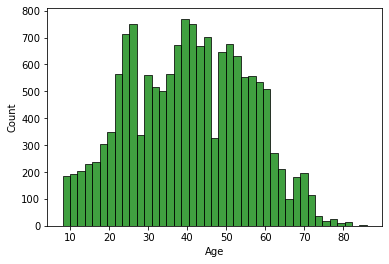

In [61]:
sns.histplot(df['Age'], color = 'g')

There are several bookings made by sub 15 year olds. This is odd. We will drop the 'Age' values for these BookingID and use KNNImputer to refill them again.

###### Subsject to change

In [62]:
df.loc[df['Age'] < 15, ['Age']] = np.nan

/Users/jorgecompleto/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [63]:
df.isna().sum()

Name                   0
Age                  884
Gender                 0
d_Longevity            0
d_Churn                0
d_TypeTravel           0
d_Single               0
d_Double               0
RewardPoints           0
Recommendation         0
Comfort                0
ReceptionSchedule      0
FoodDrink              0
Location               0
Wifi                   0
Amenities              0
Staff                  0
OnlineBooking          0
PriceQuality           0
RoomSpace              0
CheckOut               0
Checkin                0
Cleanliness            0
BarService             0
dtype: int64

In [64]:
from sklearn.impute import KNNImputer

df_knn = df.drop(columns=["Name"])

imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_matrix = imputer.fit_transform(df_knn)

df_v2 = pd.DataFrame(data=imputed_matrix, columns=df_knn.columns, index=df_knn.index)

In [65]:
df.loc[df['Age'].isna()]

,Name,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
119,Ms. Jennifer Smith,NaN,1,0,1,1,0,0,4504,1.785714,...,1,2,1,1,1,1,4,1,3,1
122,Mr. Justin Keith,NaN,0,1,0,0,0,0,4642,3.285714,...,1,4,1,1,4,5,5,5,4,1
126,Ms. Elizabeth Tyler,NaN,1,1,1,1,0,0,5151,2.428571,...,2,2,2,2,3,4,3,2,4,2
131,Ms. Summer Garcia,NaN,1,0,1,1,0,0,5133,1.785714,...,1,2,1,1,1,3,3,3,2,1
141,Ms. Michelle Butler,NaN,1,1,0,0,1,1,5353,4.142857,...,4,4,4,5,5,4,5,3,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15445,Ms. Elizabeth Wilson,NaN,1,1,0,1,1,1,5438,4.500000,...,5,5,5,5,4,4,5,4,4,5
15446,Mr. Samuel Wilson,NaN,0,1,1,0,0,0,4059,3.285714,...,3,5,5,1,2,2,5,5,1,5
15496,Mr. Brandon Rosales,NaN,0,1,1,0,0,0,4733,3.000000,...,4,2,2,5,4,1,1,2,3,2


In [66]:
df_v2.loc[df_v2['Age'].isna()]

,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,Comfort,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,


We no longer have NaN values in our dataset.

In [67]:
df_v2['Age'] = df_v2['Age'].apply(np.floor)
df_v2.head()

,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,Comfort,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
0,48.0,1.0,1.0,1.0,1.0,1.0,1.0,4907.0,3.285714,3.0,...,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0
1,57.0,0.0,1.0,0.0,1.0,1.0,1.0,6724.0,3.142857,1.0,...,5.0,3.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,2.0
2,49.0,0.0,1.0,1.0,1.0,1.0,1.0,4365.0,2.714286,3.0,...,1.0,4.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0
3,29.0,1.0,1.0,0.0,0.0,0.0,0.0,3849.0,3.142857,1.0,...,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0
4,33.0,0.0,1.0,0.0,1.0,1.0,1.0,5376.0,3.571429,2.0,...,5.0,5.0,5.0,5.0,5.0,3.0,4.0,1.0,3.0,5.0


Rounding the 'Age' variable because some values that were imputed with KNN Imputer had decimal values.

<AxesSubplot:xlabel='Age', ylabel='Count'>

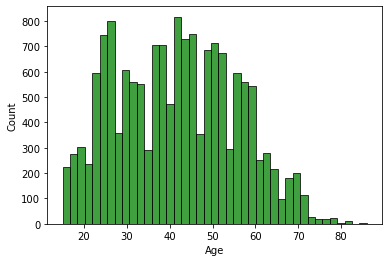

In [68]:
sns.histplot(df_v2['Age'], color = 'g')

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

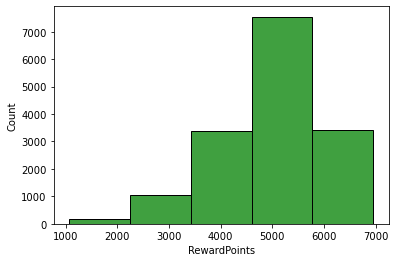

In [69]:
sns.histplot(df_v2['RewardPoints'], color = 'g', bins = 5)

We will transform the Reward Points variable into 5 different bins.

In [70]:
df_v2['RewardPoints_bins'] = pd.cut(df['RewardPoints'], 5, labels = ["very low", "low", "medium", "high", "very high"])
df_v2

,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,Comfort,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,RewardPoints_bins
BookingID,,,,,,,,,,,,,,,,,,,,,
0,48.0,1.0,1.0,1.0,1.0,1.0,1.0,4907.0,3.285714,3.0,...,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,high
1,57.0,0.0,1.0,0.0,1.0,1.0,1.0,6724.0,3.142857,1.0,...,3.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,2.0,very high
2,49.0,0.0,1.0,1.0,1.0,1.0,1.0,4365.0,2.714286,3.0,...,4.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0,medium
3,29.0,1.0,1.0,0.0,0.0,0.0,0.0,3849.0,3.142857,1.0,...,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,medium
4,33.0,0.0,1.0,0.0,1.0,1.0,1.0,5376.0,3.571429,2.0,...,5.0,5.0,5.0,5.0,3.0,4.0,1.0,3.0,5.0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,34.0,1.0,0.0,1.0,1.0,0.0,0.0,4968.0,2.714286,2.0,...,2.0,4.0,3.0,4.0,5.0,1.0,3.0,4.0,3.0,high
15585,22.0,1.0,0.0,1.0,1.0,0.0,0.0,4970.0,3.571429,3.0,...,3.0,5.0,5.0,3.0,1.0,3.0,4.0,4.0,5.0,high
15586,58.0,0.0,1.0,0.0,1.0,1.0,1.0,4046.0,3.214286,1.0,...,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,medium


In [71]:
df_v2['RewardPoints_bins'] = df_v2['RewardPoints_bins'].replace('very low',0).replace('low',1).replace('medium',2).replace('high', 3).replace('very high', 4)
df_v2.head()

,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,Comfort,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,RewardPoints_bins
BookingID,,,,,,,,,,,,,,,,,,,,,
0,48.0,1.0,1.0,1.0,1.0,1.0,1.0,4907.0,3.285714,3.0,...,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3
1,57.0,0.0,1.0,0.0,1.0,1.0,1.0,6724.0,3.142857,1.0,...,3.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,2.0,4
2,49.0,0.0,1.0,1.0,1.0,1.0,1.0,4365.0,2.714286,3.0,...,4.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0,2
3,29.0,1.0,1.0,0.0,0.0,0.0,0.0,3849.0,3.142857,1.0,...,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2
4,33.0,0.0,1.0,0.0,1.0,1.0,1.0,5376.0,3.571429,2.0,...,5.0,5.0,5.0,5.0,3.0,4.0,1.0,3.0,5.0,3


In [72]:
df_v2['RewardPoints_bins'] = df_v2['RewardPoints_bins'].astype('int')
df_v2['RewardPoints_bins'].dtype

dtype('int64')

In [73]:
df_v2['Age_bin'] = pd.qcut(df_v2['Age'], q = 5)
bin_labels_5 = {1.0, 2.0, 3.0, 4.0, 5.0}
df_v2['Age_bin'] = pd.qcut(df_v2['Age'], 
                            q = [0, .2, .4, .6, .8, 1],
                              labels = bin_labels_5)

In [74]:
df_v2['Age_bin'] = df_v2['Age_bin'].astype('int')
df_v2['Age_bin'].dtype

dtype('int64')

Binning of RewardPoints and Age variable in order to improve graphical visualization.

#### 3.3 Data Scalling

In [75]:
scaled_df = MinMaxScaler().fit_transform(df_v2)
scaled_df

array([[0.46478873, 1.        , 1.        , ..., 0.8       , 0.75      ,
        0.75      ],
       [0.5915493 , 0.        , 1.        , ..., 0.4       , 1.        ,
        1.        ],
       [0.47887324, 0.        , 1.        , ..., 0.2       , 0.5       ,
        0.75      ],
       ...,
       [0.6056338 , 0.        , 1.        , ..., 0.8       , 0.5       ,
        1.        ],
       [0.21126761, 0.        , 1.        , ..., 1.        , 0.75      ,
        0.25      ],
       [0.33802817, 0.        , 1.        , ..., 0.6       , 0.75      ,
        0.5       ]])

In [76]:
cols = df_v2.columns
#index = df_v2.index
scaled_df = pd.DataFrame(scaled_df, columns = cols)
scaled_df

,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,Comfort,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,RewardPoints_bins,Age_bin
0,0.464789,1.0,1.0,1.0,1.0,1.0,1.0,0.652787,0.555556,0.6,...,0.75,0.6,0.50,0.6,0.50,0.75,0.50,0.8,0.75,0.75
1,0.591549,0.0,1.0,0.0,1.0,1.0,1.0,0.961591,0.518519,0.2,...,0.75,1.0,1.00,1.0,1.00,0.00,1.00,0.4,1.00,1.00
2,0.478873,0.0,1.0,1.0,1.0,1.0,1.0,0.560673,0.407407,0.6,...,0.75,0.6,0.50,0.4,0.50,0.25,0.50,0.2,0.50,0.75
3,0.197183,1.0,1.0,0.0,0.0,0.0,0.0,0.472978,0.518519,0.2,...,1.00,0.8,0.75,0.8,0.75,0.75,0.75,0.6,0.50,0.25
4,0.253521,0.0,1.0,0.0,1.0,1.0,1.0,0.732495,0.629630,0.4,...,1.00,1.0,1.00,0.6,0.75,0.00,0.50,1.0,0.75,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15575,0.267606,1.0,0.0,1.0,1.0,0.0,0.0,0.663154,0.407407,0.4,...,0.75,0.6,0.75,1.0,0.00,0.50,0.75,0.6,0.75,0.25
15576,0.098592,1.0,0.0,1.0,1.0,0.0,0.0,0.663494,0.629630,0.6,...,1.00,1.0,0.50,0.2,0.50,0.75,0.75,1.0,0.75,0.00
15577,0.605634,0.0,1.0,0.0,1.0,1.0,1.0,0.506458,0.537037,0.2,...,1.00,0.8,0.75,0.8,0.75,1.00,0.75,0.8,0.50,1.00
15578,0.211268,0.0,1.0,0.0,0.0,0.0,0.0,0.694935,0.759259,0.8,...,1.00,1.0,0.25,1.0,0.75,0.50,0.75,1.0,0.75,0.25


Data is currently scalled and ready for kmeans to be applied.

#### 3.4 Data Reduction

<AxesSubplot:>

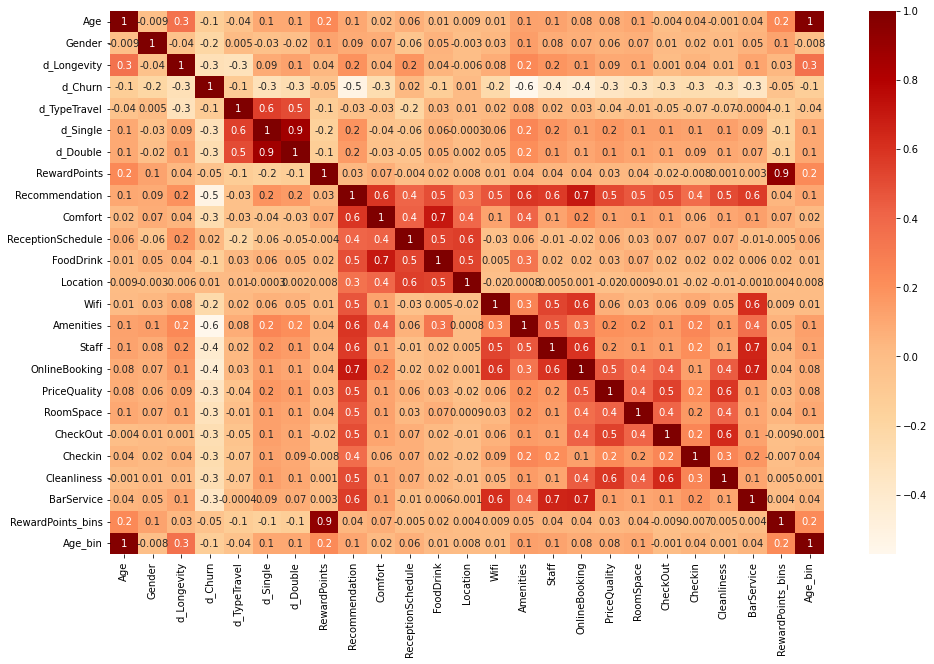

In [77]:
scaled_corr = scaled_df.corr(method = 'spearman')
figure_2 = plt.figure(figsize = (16, 10))
sns.heatmap(scaled_corr, cmap = 'OrRd',annot = True, fmt = '.1g')

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

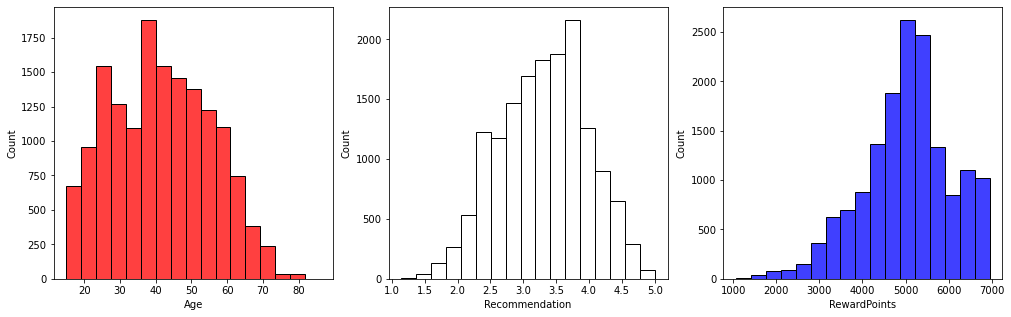

In [78]:
fig, axes = plt.subplots(1, 3, figsize = (17,5))
sns.histplot(ax = axes[0], data = df_v2, x = 'Age', color = "r", bins = 17)
sns.histplot(ax = axes[1], data = df_v2, x = 'Recommendation', color = "w", bins = 17)
sns.histplot(ax = axes[2], data = df_v2, x = 'RewardPoints', color = "b", bins = 17)

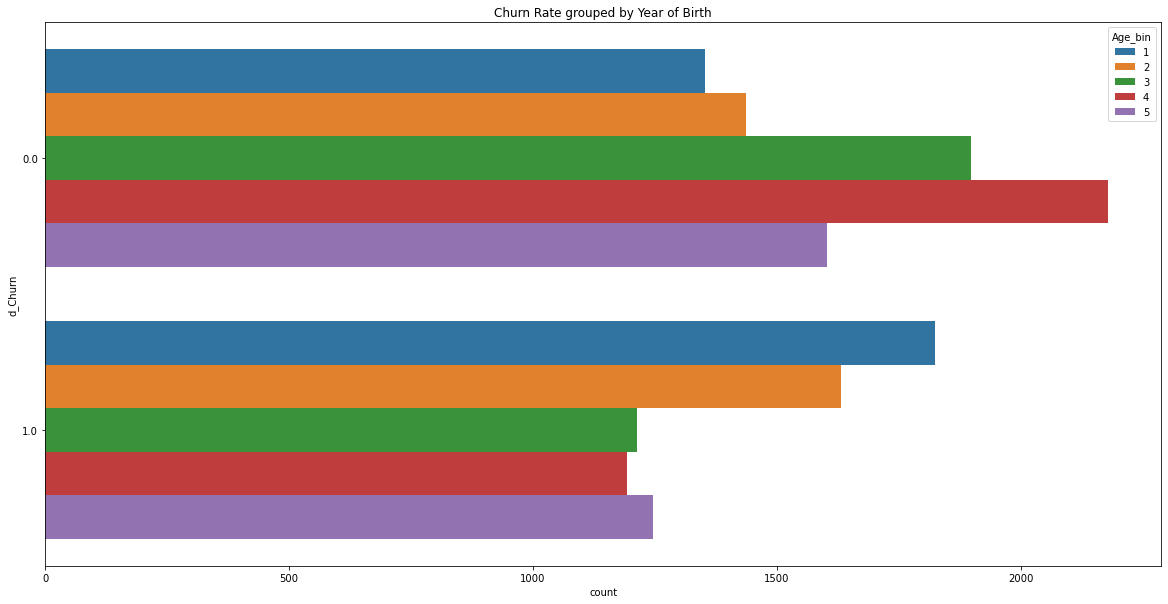

In [79]:
plt.figure(figsize=(20,10))
sns.countplot(y = 'd_Churn', hue = 'Age_bin', data = df_v2)
plt.title('Churn Rate grouped by Year of Birth')
plt.show()
plt.close()

Desenvolver legenda.

#### 3.5 Applying KMeans

In [80]:
df_client = scaled_df[['Recommendation', 'RewardPoints', 'Age']].copy()
df_client

,Recommendation,RewardPoints,Age
0,0.555556,0.652787,0.464789
1,0.518519,0.961591,0.591549
2,0.407407,0.560673,0.478873
3,0.518519,0.472978,0.197183
4,0.629630,0.732495,0.253521
...,...,...,...
15575,0.407407,0.663154,0.267606
15576,0.629630,0.663494,0.098592
15577,0.537037,0.506458,0.605634
15578,0.759259,0.694935,0.211268


In [81]:
ks = range(1, 11) # loop between 1 and 10
inertias = [] # also called sum of squared errors (difference between the points of the data and the centroid)

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(df_client)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

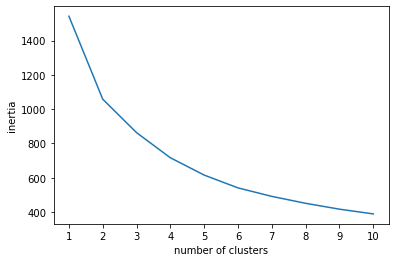

In [82]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

#### Clustering

In [83]:
model_k3 = KMeans(n_clusters = 3, random_state = 100)

In [84]:
df_client_k3 = df_client.copy() # copy the prod dataset in order to join the label column to the original one
model_k3.fit(df_client_k3)

KMeans(n_clusters=3, random_state=100)

In [85]:
df_client_k3['label'] = model_k3.labels_
df_client_k3

,Recommendation,RewardPoints,Age,label
0,0.555556,0.652787,0.464789,1
1,0.518519,0.961591,0.591549,1
2,0.407407,0.560673,0.478873,0
3,0.518519,0.472978,0.197183,0
4,0.629630,0.732495,0.253521,2
...,...,...,...,...
15575,0.407407,0.663154,0.267606,0
15576,0.629630,0.663494,0.098592,0
15577,0.537037,0.506458,0.605634,1
15578,0.759259,0.694935,0.211268,2


In [86]:
df_client_k3.groupby(['label']).mean().transpose()

label,0,1,2
Recommendation,0.425862,0.573758,0.697949
RewardPoints,0.646387,0.797490,0.543283
Age,0.216300,0.553540,0.327021


Testar um kmean RoomType e TypeTravel contra os surveys/recomendação média

In [87]:
Survey = scaled_df[['Comfort', 'Location', 'Wifi', 'Staff', 'OnlineBooking', 'PriceQuality']].copy()
Survey

,Comfort,Location,Wifi,Staff,OnlineBooking,PriceQuality
0,0.6,0.75,0.8,0.75,0.6,0.50
1,0.2,0.00,1.0,0.75,1.0,1.00
2,0.6,0.50,0.2,0.75,0.6,0.50
3,0.2,0.00,0.8,1.00,0.8,0.75
4,0.4,0.25,1.0,1.00,1.0,1.00
...,...,...,...,...,...,...
15575,0.4,0.25,0.6,0.75,0.6,0.75
15576,0.6,0.50,1.0,1.00,1.0,0.50
15577,0.2,0.00,0.6,1.00,0.8,0.75
15578,0.8,0.75,1.0,1.00,1.0,0.25


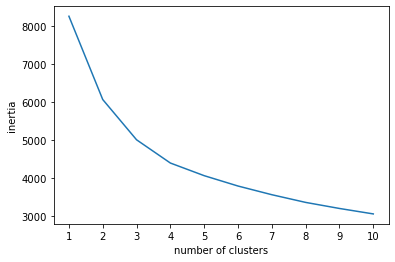

In [88]:
ks_value2 = range(1, 11)
inertias_value2 = []

for k in ks_value2:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(Survey)

    # Append the inertia to the list of inertias
    inertias_value2.append(model.inertia_)

    
    
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks_value2, inertias_value2)

# define the label for x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks in x axis using the values of ks
plt.xticks(ks_value2)
# call plt.show()
plt.show()

In [89]:
Survey_k4 = Survey.copy()
Survey_model_k4 = KMeans(n_clusters = 4, random_state = 100).fit(Survey_k4)

In [90]:
Survey_k4['label_2'] = Survey_model_k4.labels_

In [91]:
Survey_k4['label_2'].value_counts()

2    5023
0    3923
3    3410
1    3224
Name: label_2, dtype: int64

In [92]:
Survey_k4.groupby(['label_2']).mean().transpose()

label_2,0,1,2,3
Comfort,0.834056,0.498945,0.449691,0.503226
Location,0.822967,0.482087,0.245620,0.504252
Wifi,0.746622,0.344665,0.755326,0.663871
Staff,0.784604,0.156250,0.801613,0.631745
OnlineBooking,0.843436,0.390447,0.852518,0.561232
PriceQuality,0.757392,0.603831,0.791260,0.201906


In [93]:
df_merged = pd.concat([Survey_k4, df_client_k3], axis = 1)
df_merged

,Comfort,Location,Wifi,Staff,OnlineBooking,PriceQuality,label_2,Recommendation,RewardPoints,Age,label
0,0.6,0.75,0.8,0.75,0.6,0.50,0,0.555556,0.652787,0.464789,1
1,0.2,0.00,1.0,0.75,1.0,1.00,2,0.518519,0.961591,0.591549,1
2,0.6,0.50,0.2,0.75,0.6,0.50,3,0.407407,0.560673,0.478873,0
3,0.2,0.00,0.8,1.00,0.8,0.75,2,0.518519,0.472978,0.197183,0
4,0.4,0.25,1.0,1.00,1.0,1.00,2,0.629630,0.732495,0.253521,2
...,...,...,...,...,...,...,...,...,...,...,...
15575,0.4,0.25,0.6,0.75,0.6,0.75,2,0.407407,0.663154,0.267606,0
15576,0.6,0.50,1.0,1.00,1.0,0.50,2,0.629630,0.663494,0.098592,0
15577,0.2,0.00,0.6,1.00,0.8,0.75,2,0.537037,0.506458,0.605634,1
15578,0.8,0.75,1.0,1.00,1.0,0.25,0,0.759259,0.694935,0.211268,2


In [94]:
df_merged['cluster'] = df_merged['label_2'].astype(str) + df_merged['label'].astype(str)
df_merged

,Comfort,Location,Wifi,Staff,OnlineBooking,PriceQuality,label_2,Recommendation,RewardPoints,Age,label,cluster
0,0.6,0.75,0.8,0.75,0.6,0.50,0,0.555556,0.652787,0.464789,1,01
1,0.2,0.00,1.0,0.75,1.0,1.00,2,0.518519,0.961591,0.591549,1,21
2,0.6,0.50,0.2,0.75,0.6,0.50,3,0.407407,0.560673,0.478873,0,30
3,0.2,0.00,0.8,1.00,0.8,0.75,2,0.518519,0.472978,0.197183,0,20
4,0.4,0.25,1.0,1.00,1.0,1.00,2,0.629630,0.732495,0.253521,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...
15575,0.4,0.25,0.6,0.75,0.6,0.75,2,0.407407,0.663154,0.267606,0,20
15576,0.6,0.50,1.0,1.00,1.0,0.50,2,0.629630,0.663494,0.098592,0,20
15577,0.2,0.00,0.6,1.00,0.8,0.75,2,0.537037,0.506458,0.605634,1,21
15578,0.8,0.75,1.0,1.00,1.0,0.25,0,0.759259,0.694935,0.211268,2,02


In [95]:
df_merged['cluster'].value_counts()

10    2156
21    2099
02    2097
22    1789
30    1657
01    1529
31    1340
20    1135
11     836
32     413
00     297
12     232
Name: cluster, dtype: int64

In [96]:
df_final = df_v2.copy()
df_final

,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,Comfort,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,RewardPoints_bins,Age_bin
BookingID,,,,,,,,,,,,,,,,,,,,,
0,48.0,1.0,1.0,1.0,1.0,1.0,1.0,4907.0,3.285714,3.0,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3,4
1,57.0,0.0,1.0,0.0,1.0,1.0,1.0,6724.0,3.142857,1.0,...,4.0,5.0,5.0,5.0,5.0,1.0,5.0,2.0,4,5
2,49.0,0.0,1.0,1.0,1.0,1.0,1.0,4365.0,2.714286,3.0,...,4.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0,2,4
3,29.0,1.0,1.0,0.0,0.0,0.0,0.0,3849.0,3.142857,1.0,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2,2
4,33.0,0.0,1.0,0.0,1.0,1.0,1.0,5376.0,3.571429,2.0,...,5.0,5.0,5.0,3.0,4.0,1.0,3.0,5.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,34.0,1.0,0.0,1.0,1.0,0.0,0.0,4968.0,2.714286,2.0,...,4.0,3.0,4.0,5.0,1.0,3.0,4.0,3.0,3,2
15585,22.0,1.0,0.0,1.0,1.0,0.0,0.0,4970.0,3.571429,3.0,...,5.0,5.0,3.0,1.0,3.0,4.0,4.0,5.0,3,1
15586,58.0,0.0,1.0,0.0,1.0,1.0,1.0,4046.0,3.214286,1.0,...,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,2,5


In [97]:
df_final.reset_index(inplace=True)
df_final

,BookingID,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,RewardPoints_bins,Age_bin
0,0,48.0,1.0,1.0,1.0,1.0,1.0,1.0,4907.0,3.285714,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3,4
1,1,57.0,0.0,1.0,0.0,1.0,1.0,1.0,6724.0,3.142857,...,4.0,5.0,5.0,5.0,5.0,1.0,5.0,2.0,4,5
2,2,49.0,0.0,1.0,1.0,1.0,1.0,1.0,4365.0,2.714286,...,4.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0,2,4
3,3,29.0,1.0,1.0,0.0,0.0,0.0,0.0,3849.0,3.142857,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2,2
4,4,33.0,0.0,1.0,0.0,1.0,1.0,1.0,5376.0,3.571429,...,5.0,5.0,5.0,3.0,4.0,1.0,3.0,5.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15575,15584,34.0,1.0,0.0,1.0,1.0,0.0,0.0,4968.0,2.714286,...,4.0,3.0,4.0,5.0,1.0,3.0,4.0,3.0,3,2
15576,15585,22.0,1.0,0.0,1.0,1.0,0.0,0.0,4970.0,3.571429,...,5.0,5.0,3.0,1.0,3.0,4.0,4.0,5.0,3,1
15577,15586,58.0,0.0,1.0,0.0,1.0,1.0,1.0,4046.0,3.214286,...,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,2,5
15578,15587,30.0,0.0,1.0,0.0,0.0,0.0,0.0,5155.0,4.071429,...,5.0,5.0,2.0,5.0,4.0,3.0,4.0,5.0,3,2


In [98]:
df_final = pd.concat([df_final, df_merged['cluster']], axis = 1)
df_final

,BookingID,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,RewardPoints_bins,Age_bin,cluster
0,0,48.0,1.0,1.0,1.0,1.0,1.0,1.0,4907.0,3.285714,...,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3,4,01
1,1,57.0,0.0,1.0,0.0,1.0,1.0,1.0,6724.0,3.142857,...,5.0,5.0,5.0,5.0,1.0,5.0,2.0,4,5,21
2,2,49.0,0.0,1.0,1.0,1.0,1.0,1.0,4365.0,2.714286,...,3.0,3.0,2.0,3.0,2.0,3.0,1.0,2,4,30
3,3,29.0,1.0,1.0,0.0,0.0,0.0,0.0,3849.0,3.142857,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2,2,20
4,4,33.0,0.0,1.0,0.0,1.0,1.0,1.0,5376.0,3.571429,...,5.0,5.0,3.0,4.0,1.0,3.0,5.0,3,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15575,15584,34.0,1.0,0.0,1.0,1.0,0.0,0.0,4968.0,2.714286,...,3.0,4.0,5.0,1.0,3.0,4.0,3.0,3,2,20
15576,15585,22.0,1.0,0.0,1.0,1.0,0.0,0.0,4970.0,3.571429,...,5.0,3.0,1.0,3.0,4.0,4.0,5.0,3,1,20
15577,15586,58.0,0.0,1.0,0.0,1.0,1.0,1.0,4046.0,3.214286,...,4.0,4.0,4.0,4.0,5.0,4.0,4.0,2,5,21
15578,15587,30.0,0.0,1.0,0.0,0.0,0.0,0.0,5155.0,4.071429,...,5.0,2.0,5.0,4.0,3.0,4.0,5.0,3,2,02


In [101]:
df_final['cluster'].value_counts()

10    2156
21    2099
02    2097
22    1789
30    1657
01    1529
31    1340
20    1135
11     836
32     413
00     297
12     232
Name: cluster, dtype: int64

In [102]:
df_final.set_index('BookingID', inplace = True)
df_final

,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,Comfort,...,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,RewardPoints_bins,Age_bin,cluster
BookingID,,,,,,,,,,,,,,,,,,,,,
0,48.0,1.0,1.0,1.0,1.0,1.0,1.0,4907.0,3.285714,3.0,...,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3,4,01
1,57.0,0.0,1.0,0.0,1.0,1.0,1.0,6724.0,3.142857,1.0,...,5.0,5.0,5.0,5.0,1.0,5.0,2.0,4,5,21
2,49.0,0.0,1.0,1.0,1.0,1.0,1.0,4365.0,2.714286,3.0,...,3.0,3.0,2.0,3.0,2.0,3.0,1.0,2,4,30
3,29.0,1.0,1.0,0.0,0.0,0.0,0.0,3849.0,3.142857,1.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2,2,20
4,33.0,0.0,1.0,0.0,1.0,1.0,1.0,5376.0,3.571429,2.0,...,5.0,5.0,3.0,4.0,1.0,3.0,5.0,3,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,34.0,1.0,0.0,1.0,1.0,0.0,0.0,4968.0,2.714286,2.0,...,3.0,4.0,5.0,1.0,3.0,4.0,3.0,3,2,20
15585,22.0,1.0,0.0,1.0,1.0,0.0,0.0,4970.0,3.571429,3.0,...,5.0,3.0,1.0,3.0,4.0,4.0,5.0,3,1,20
15586,58.0,0.0,1.0,0.0,1.0,1.0,1.0,4046.0,3.214286,1.0,...,4.0,4.0,4.0,4.0,5.0,4.0,4.0,2,5,21
